In [7]:
%pip install matplotlib numpy tensorflow --quiet

Note: you may need to restart the kernel to use updated packages.


In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

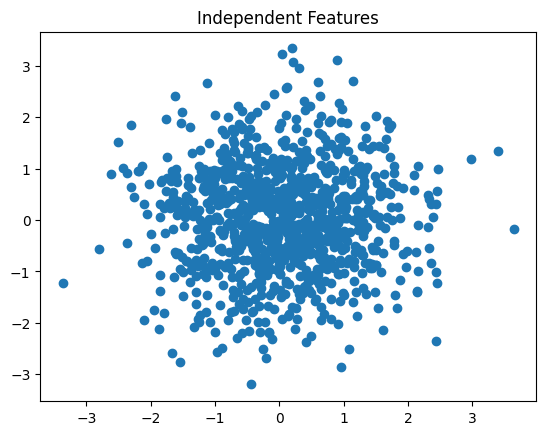

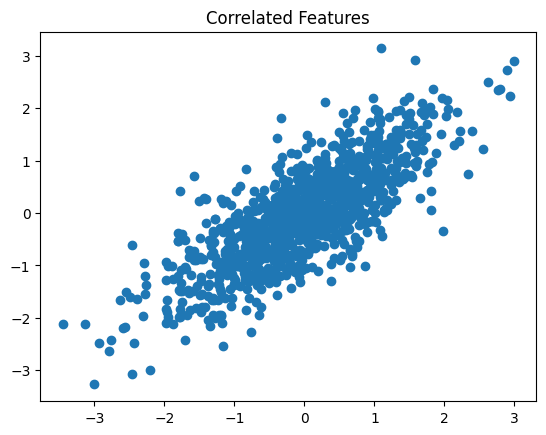

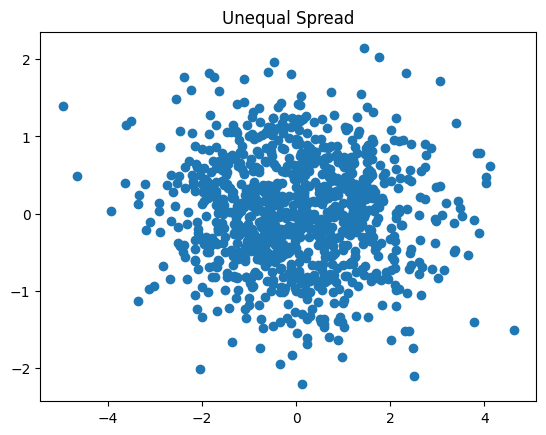

In [9]:
#Example of data with no correlation, with correlation and unequal spread
data = np.random.multivariate_normal([0,0], [[1, 0], [0,1]], size = 1000)
plt.scatter(data[:,0], data[:,1])
plt.title("Independent Features")
plt.show()

data = np.random.multivariate_normal([0,0], [[1, 0.8], [0.8,1]], size = 1000)
plt.scatter(data[:,0], data[:,1])
plt.title("Correlated Features")
plt.show()

data = np.random.multivariate_normal([0,0], [[2, 0], [0,0.5]], size = 1000)
plt.scatter(data[:,0], data[:,1])
plt.title("Unequal Spread")
plt.show()



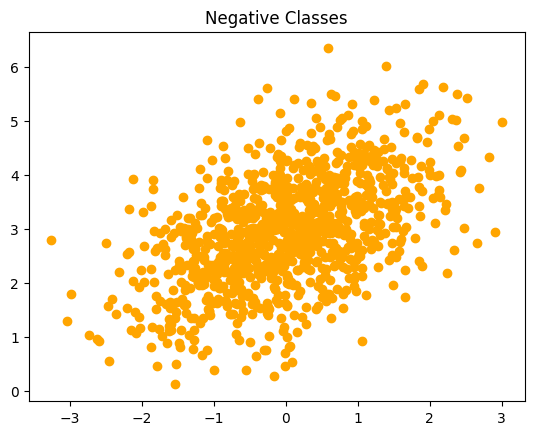

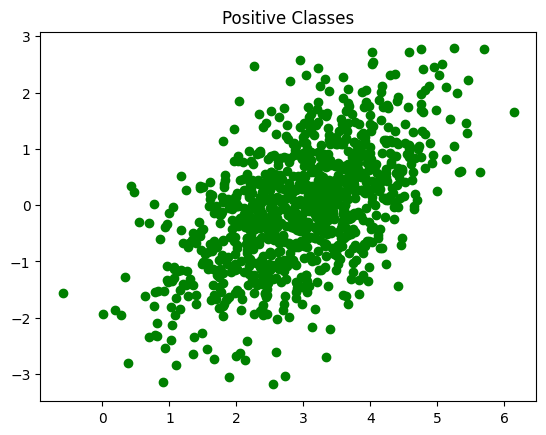

In [10]:
#Creating two classes
size = 1000
negative_classes = np.random.multivariate_normal([0,3], [[1,0.5],[0.5,1]], size)
positive_classes = np.random.multivariate_normal([3,0], [[1,0.5],[0.5,1]], size)

plt.scatter(negative_classes[:,0], negative_classes[:,1],c = 'orange')
plt.title('Negative Classes')
plt.show()
plt.scatter(positive_classes[:,0], positive_classes[:,1], c= 'green')
plt.title('Positive Classes')
plt.show()


(2000, 2)


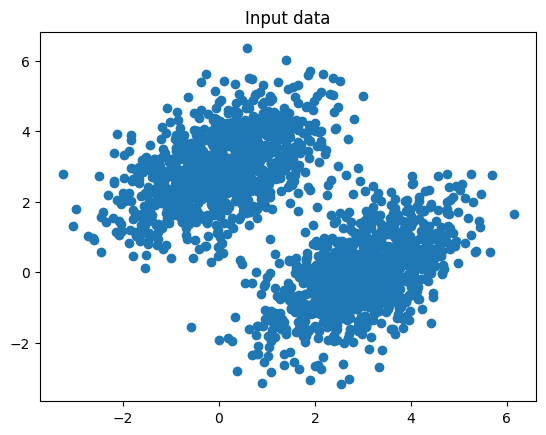

In [13]:
inputs = np.vstack((negative_classes, positive_classes)).astype(np.float32)
print(inputs.shape)


In [12]:
targets = np.vstack((np.zeros((size, 1), dtype='float32'), np.ones((size, 1), dtype= 'float32')))
targets.shape

(2000, 1)

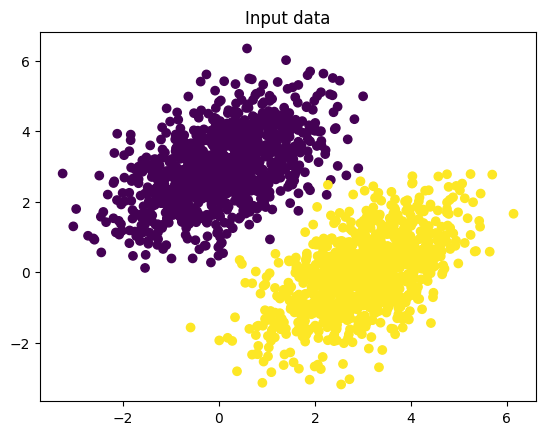

In [15]:
plt.scatter(inputs[:, 0], inputs[:, 1], c = targets[:,0])
plt.title("Input data")
plt.show()

In [25]:
#Initialize the weights and bias for the model

input_dim = 2
output_dim = 1
W = tf.Variable(initial_value = tf.random.uniform((input_dim, output_dim)))
b = tf.Variable(initial_value = tf.zeros((output_dim,)))
W, b

(<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
 array([[0.31079197],
        [0.48201644]], dtype=float32)>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>)

In [30]:
def squared_loss(targets, predictions):
    return tf.square(targets - predictions)

In [39]:
learning_velocity = 0.1
def one_training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = tf.matmul(inputs, W) + b
        per_sample_losses = squared_loss(targets, predictions)
        average_loss = tf.reduce_mean(per_sample_losses)
    gradient_wrt_W, gradient_wrt_b = tape.gradient(average_loss, [W,b])
    W.assign_sub(learning_velocity * gradient_wrt_W)
    b.assign_sub(learning_velocity * gradient_wrt_b)
    return average_loss

In [40]:
#Batch Processing (No Mini Batch For Now)

for i in range(50):
    loss = one_training_step(inputs, targets)
    print(f"Loss at batch {i}: {loss}")

Loss at batch 0: 0.21733982861042023
Loss at batch 1: 0.11982651054859161
Loss at batch 2: 0.10130754113197327
Loss at batch 3: 0.09303715825080872
Loss at batch 4: 0.08657648414373398
Loss at batch 5: 0.08084335178136826
Loss at batch 6: 0.07565858215093613
Loss at batch 7: 0.07095756381750107
Loss at batch 8: 0.06669370085000992
Loss at batch 9: 0.06282613426446915
Loss at batch 10: 0.05931802839040756
Loss at batch 11: 0.05613596364855766
Loss at batch 12: 0.05324963852763176
Loss at batch 13: 0.0506315603852272
Loss at batch 14: 0.048256807029247284
Loss at batch 15: 0.04610275849699974
Loss at batch 16: 0.04414891451597214
Loss at batch 17: 0.042376648634672165
Loss at batch 18: 0.04076910391449928
Loss at batch 19: 0.03931095823645592
Loss at batch 20: 0.0379883348941803
Loss at batch 21: 0.03678862750530243
Loss at batch 22: 0.03570043295621872
Loss at batch 23: 0.034713372588157654
Loss at batch 24: 0.033818040043115616
Loss at batch 25: 0.03300591930747032
Loss at batch 26: 0.

In [41]:
predictions = tf.matmul(inputs, W) + b
predictions

<tf.Tensor: shape=(2000, 1), dtype=float32, numpy=
array([[-0.03604892],
       [-0.10820499],
       [-0.3664274 ],
       ...,
       [ 1.0347744 ],
       [ 0.9499645 ],
       [ 0.74431384]], dtype=float32)>

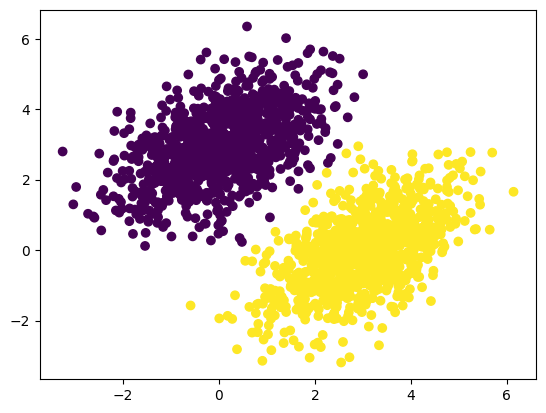

In [44]:
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

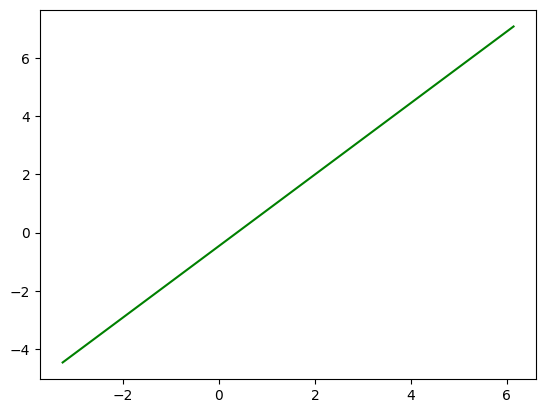

In [55]:
x_values = np.linspace(inputs[:, 0].min(), inputs[:, 0].max(), 100)
y_values = (-W[0]/W[1])*x_values + (0.5-b)/W[1]
plt.plot(x_values, y_values, "-g")

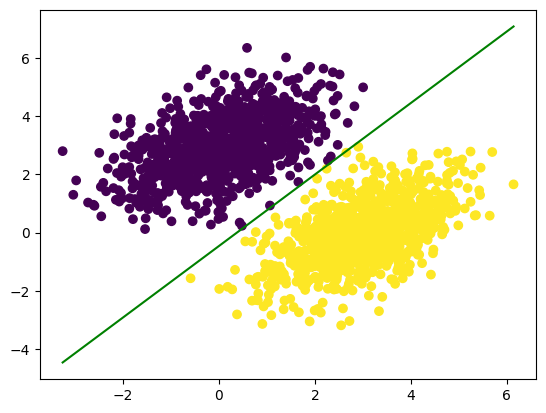

In [57]:
plt.scatter(inputs[:, 0], inputs[:, 1], c = predictions[:, 0] > 0.5)
plt.plot(x_values, y_values, "-g")